<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Getting_Started_with_nQubit_GHZstate_Qiskit_AerSimulator_mkbahk_20241023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=9722fa2f6acc3e411814672b2d90a368857c947a16752da704a0591022dc414b
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 59.1 MB/s eta 0:00:00


In [2]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
%pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.28.0.34.7
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

In [4]:
import qiskit
qiskit.__version__

'1.2.4'

In [5]:
import qiskit_aer
qiskit_aer.__version__

'0.15.1'

In [6]:
from qiskit_aer import Aer, AerSimulator, QasmSimulator, StatevectorSimulator, UnitarySimulator
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [7]:
Aer

In [8]:
AerSimulator()

AerSimulator('aer_simulator')

In [9]:
QasmSimulator()

QasmSimulator('qasm_simulator')

In [10]:
StatevectorSimulator()

StatevectorSimulator('statevector_simulator')

In [11]:
UnitarySimulator()

UnitarySimulator('unitary_simulator')

In [12]:
#backend =Aer.get_backend("qasm_simulator")
#backend =Aer.get_backend("aer_simulator_statevector")
#backend =Aer.get_backend("aer_simulator_unitary")
#backend = QasmSimulator()
backend = StatevectorSimulator()
#backend = UnitarySimulator()

In [13]:
from qiskit import QuantumCircuit

In [14]:
def n_qubit_GHZ_state(n):
  circuit = QuantumCircuit(n)
  for i in range(n-1):
    circuit.h(i)
    circuit.cx(i, i+1)
  ###
  circuit.measure_all()
  return circuit
###

In [15]:
n = 7 ### 10 Qubit정도 정상동작, 20Qubit이면 수행불가
qc = n_qubit_GHZ_state(n)

# The nQubit GHZ State

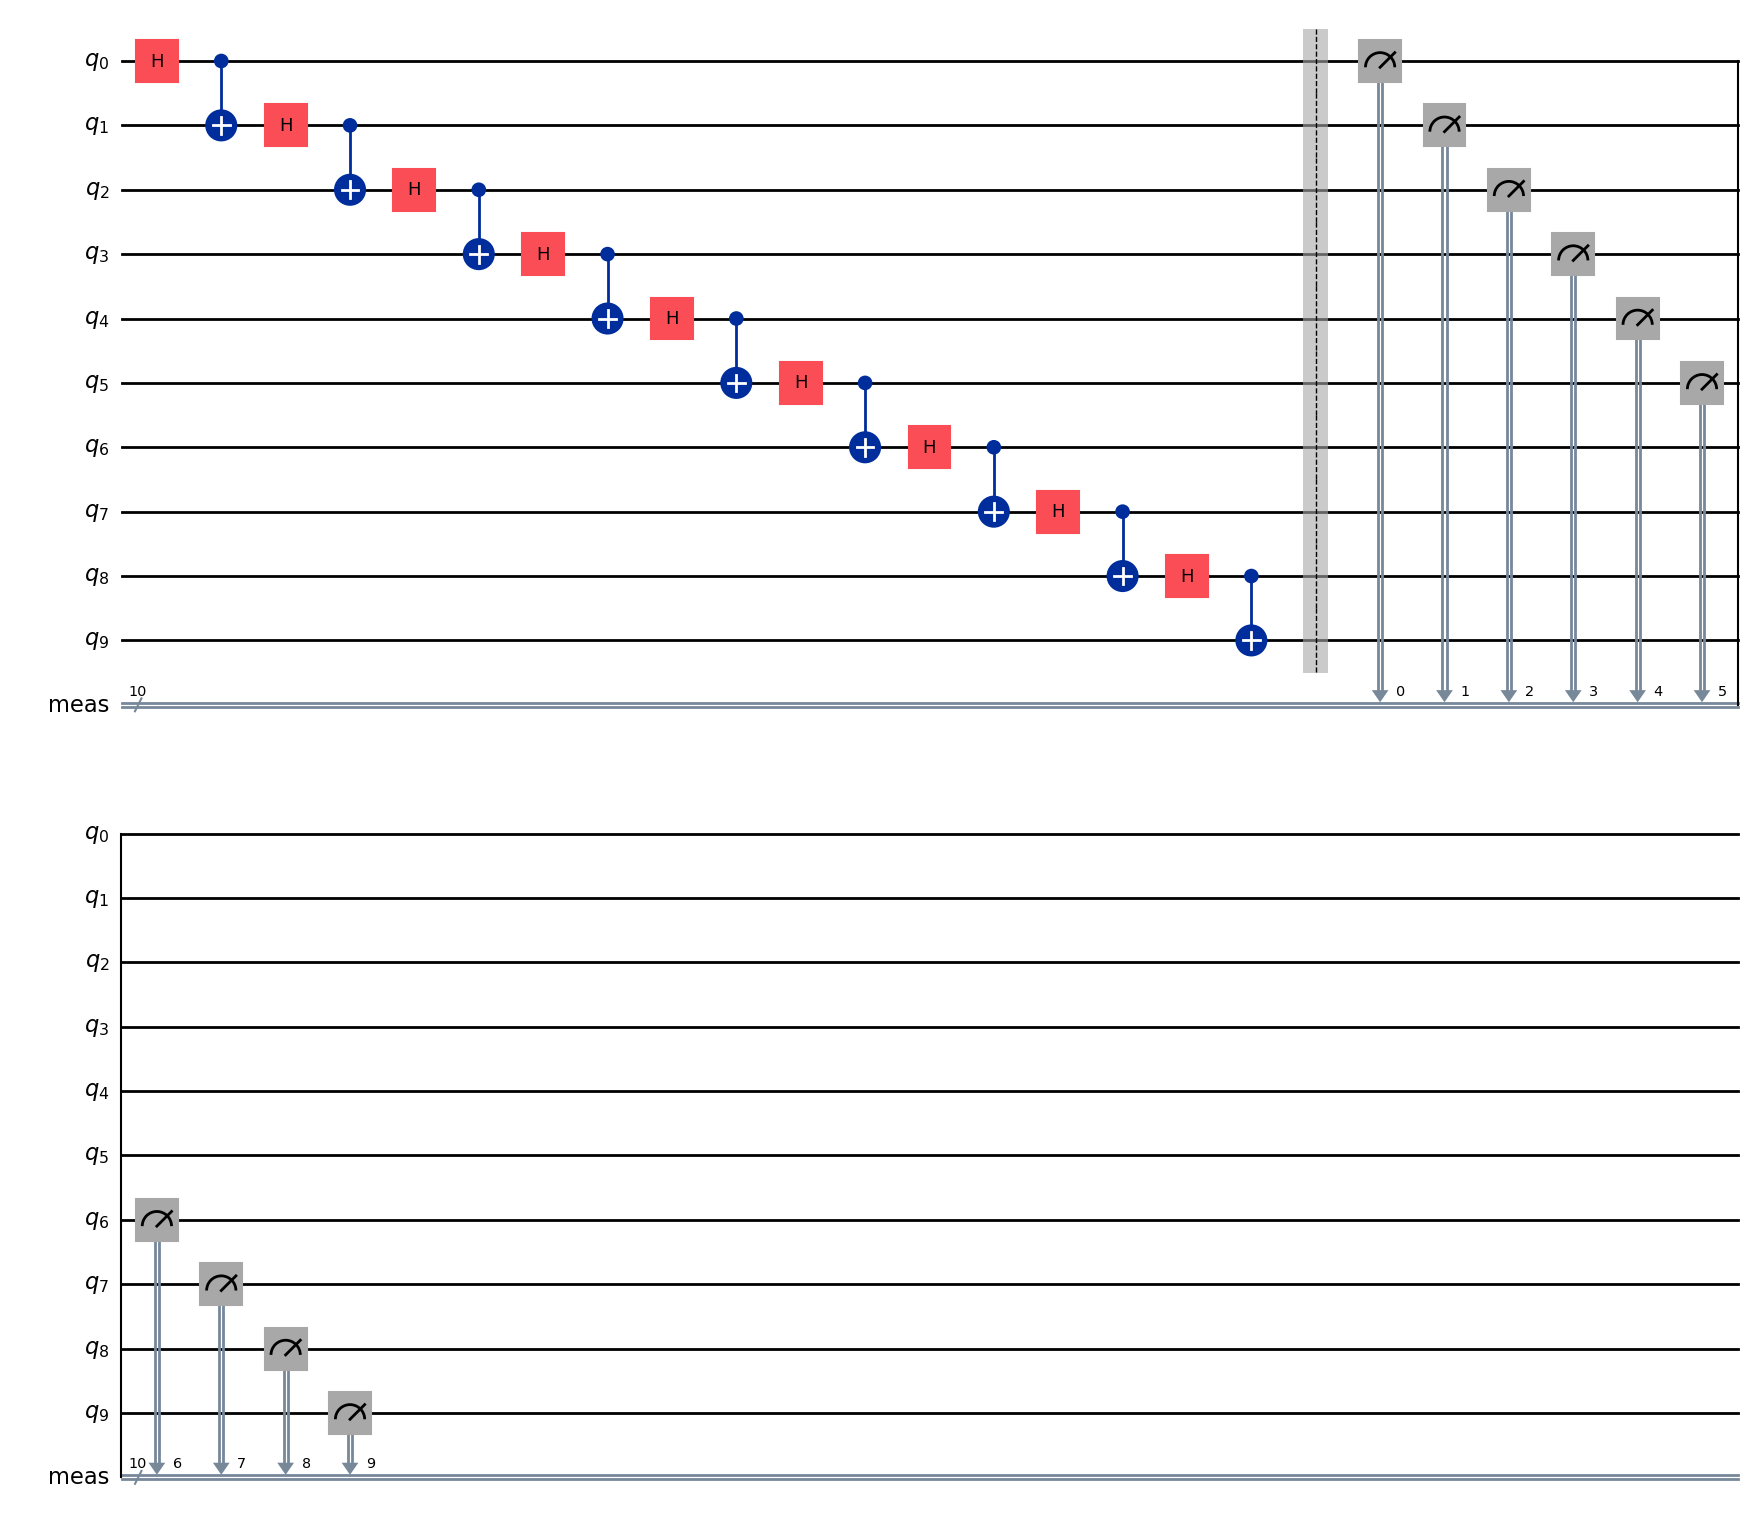

In [16]:
qc.draw(output="mpl")

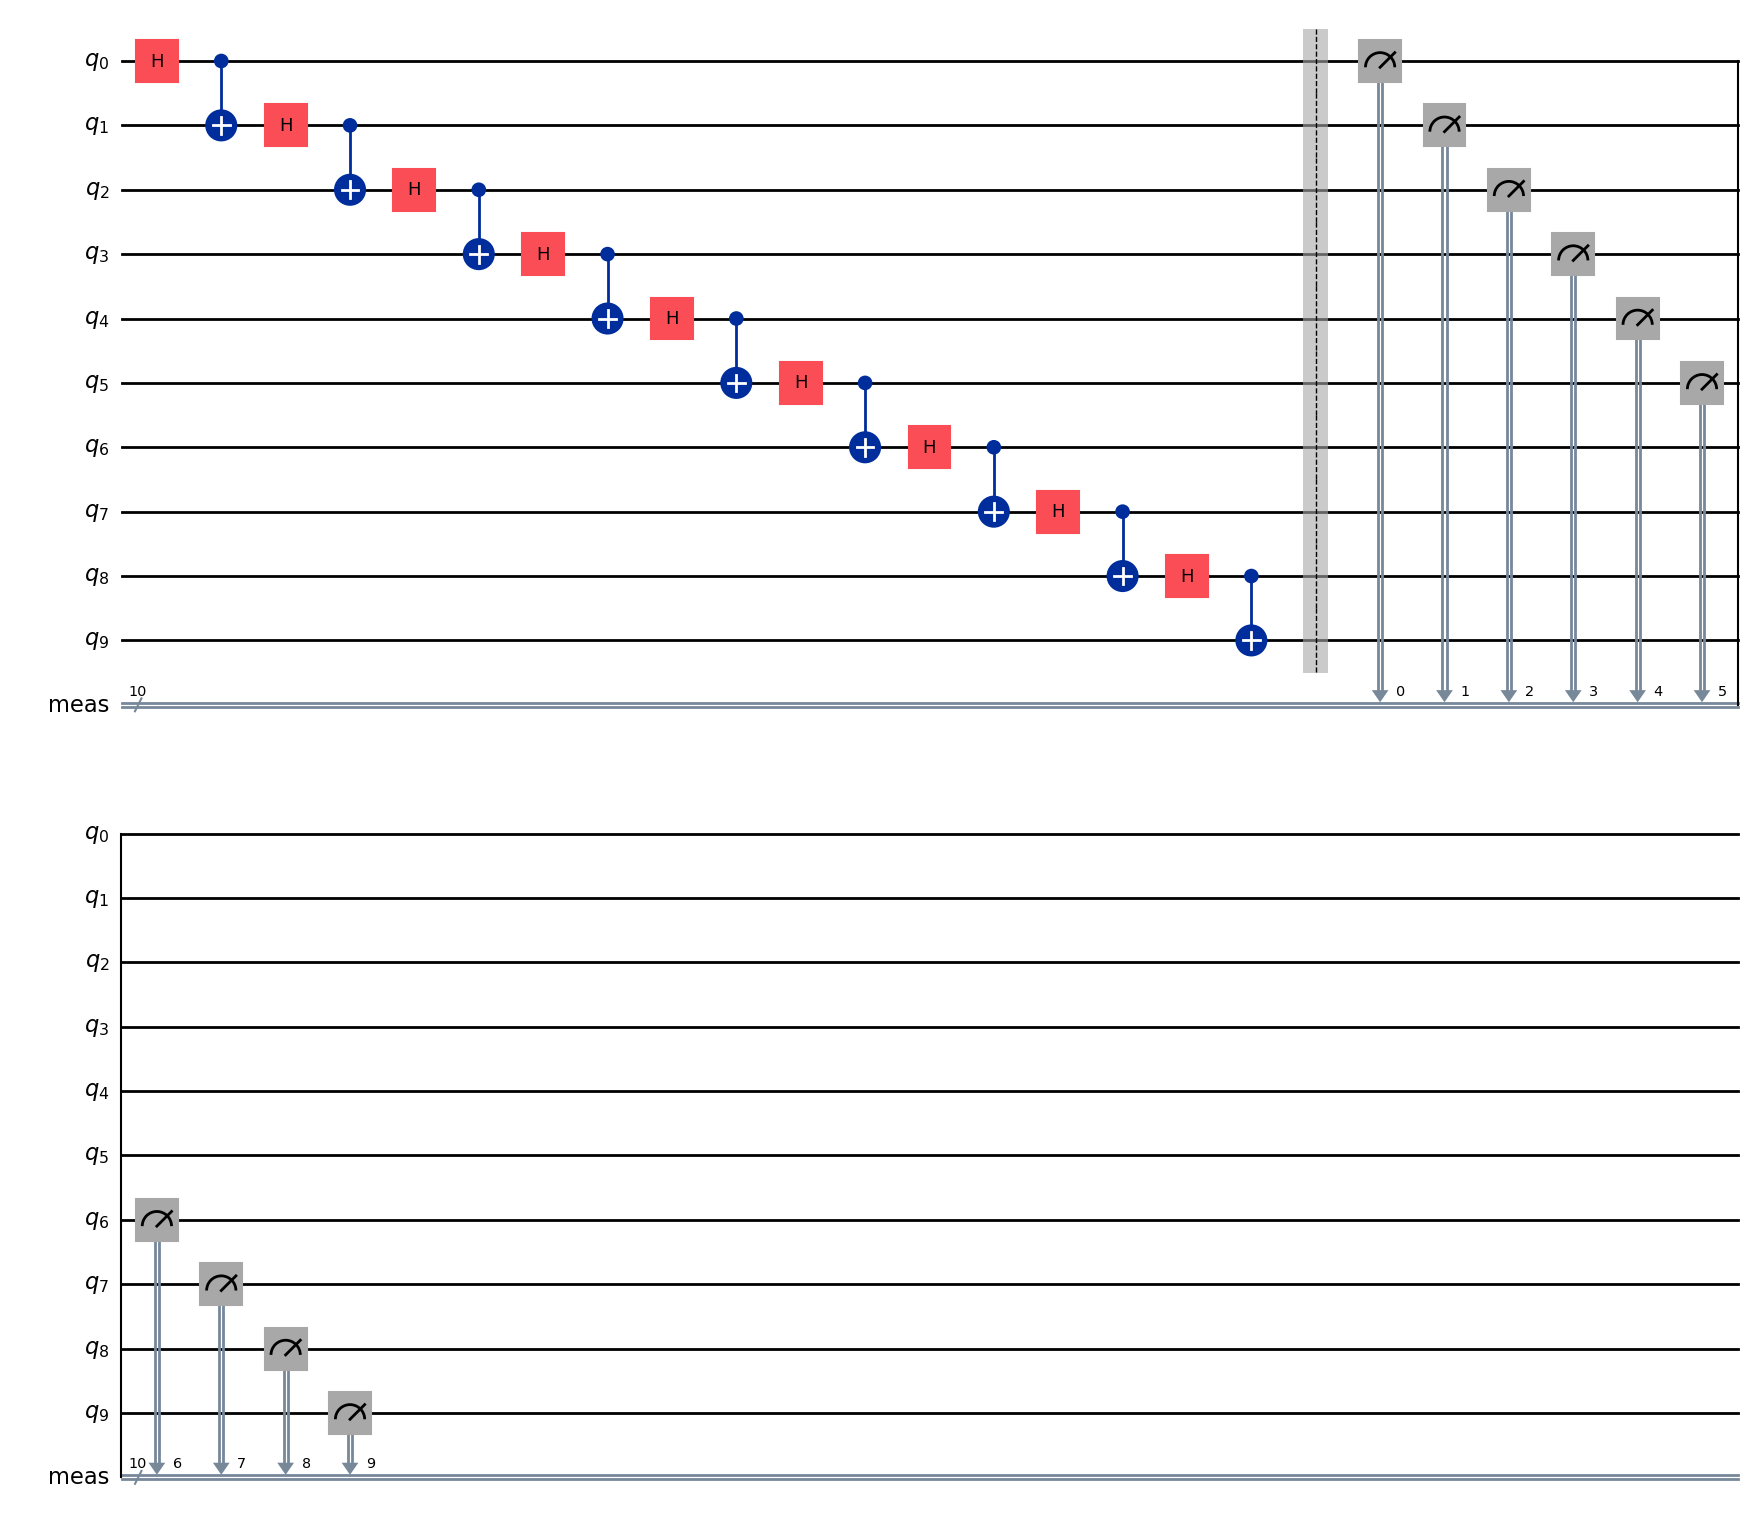

In [17]:
from qiskit.compiler import transpile, assemble
trans_qc = transpile(qc, backend=backend)
trans_qc.draw("mpl")

In [18]:
#from qiskit.providers.jobstatus import JobStatus

#job = backend.run(trans_qc, shots=1024)
#job = backend.run(circuit, shots=1024)
# Use the job ID to retrieve your job data later
#print(f">>> Job ID: {job.job_id()}")

In [19]:
from qiskit.providers.jobstatus import JobStatus
import time

job = backend.run(trans_qc, shots=1024)

print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(2)
##while

print("Job status is", job.status() )

Job ID is 8c1f3381-00d0-499b-abe9-46f847a6a5f9 

Job status is JobStatus.RUNNING
Job status is JobStatus.DONE


In [20]:
print(job.status())

JobStatus.DONE


In [21]:
### 서비스 플렛폼에 중간에 세션이 종료되었을 경우, Job이 완료되면 그 Job.ID를 이용해 결과를 추출합니다. ###
#job = service.job("csbevjh3olk6fc8cr0n0")

In [22]:
result = job.result()
result

Result(backend_name='statevector_simulator', backend_version='0.15.1', qobj_id='', job_id='8c1f3381-00d0-499b-abe9-46f847a6a5f9', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0xcd': 1, '0xc1': 1, '0x331': 1, '0x317': 2, '0xae': 1, '0x6d': 1, '0x34f': 1, '0x45': 1, '0x3dd': 2, '0xd3': 1, '0x55': 1, '0x3bb': 1, '0x334': 1, '0xbf': 1, '0x3ce': 1, '0x337': 1, '0xcf': 2, '0xea': 1, '0xb1': 2, '0x3ff': 1, '0x383': 3, '0x3aa': 3, '0x74': 3, '0x8b': 1, '0x3a9': 1, '0x340': 2, '0x38e': 1, '0x32a': 2, '0xc2': 3, '0x37': 1, '0xdb': 2, '0x3c2': 1, '0x364': 3, '0x5b': 3, '0x72': 4, '0x33d': 2, '0x309': 1, '0x3cf': 1, '0x3bd': 2, '0xe6': 3, '0xb8': 1, '0x392': 1, '0xd7': 2, '0xd5': 2, '0x324': 1, '0x5': 3, '0x3f': 1, '0x3af': 2, '0x3f0': 1, '0x37e': 2, '0x3ab': 3, '0xa8': 1, '0xbb': 1, '0x11': 3, '0x33a': 1, '0x328': 1, '0x349': 1, '0x1a': 5, '0x35d': 1, '0xdc': 1, '0x3e5': 1, '0x88': 1, '0x66': 1, '0x38f': 2, '0x16': 1, '0x71': 1

# 진폭(Applitude)의 확률 출력하기

In [23]:
counts = result.get_counts()
counts

{'0011001101': 1,
 '0011000001': 1,
 '1100110001': 1,
 '1100010111': 2,
 '0010101110': 1,
 '0001101101': 1,
 '1101001111': 1,
 '0001000101': 1,
 '1111011101': 2,
 '0011010011': 1,
 '0001010101': 1,
 '1110111011': 1,
 '1100110100': 1,
 '0010111111': 1,
 '1111001110': 1,
 '1100110111': 1,
 '0011001111': 2,
 '0011101010': 1,
 '0010110001': 2,
 '1111111111': 1,
 '1110000011': 3,
 '1110101010': 3,
 '0001110100': 3,
 '0010001011': 1,
 '1110101001': 1,
 '1101000000': 2,
 '1110001110': 1,
 '1100101010': 2,
 '0011000010': 3,
 '0000110111': 1,
 '0011011011': 2,
 '1111000010': 1,
 '1101100100': 3,
 '0001011011': 3,
 '0001110010': 4,
 '1100111101': 2,
 '1100001001': 1,
 '1111001111': 1,
 '1110111101': 2,
 '0011100110': 3,
 '0010111000': 1,
 '1110010010': 1,
 '0011010111': 2,
 '0011010101': 2,
 '1100100100': 1,
 '0000000101': 3,
 '0000111111': 1,
 '1110101111': 2,
 '1111110000': 1,
 '1101111110': 2,
 '1110101011': 3,
 '0010101000': 1,
 '0010111011': 1,
 '0000010001': 3,
 '1100111010': 1,
 '11001010

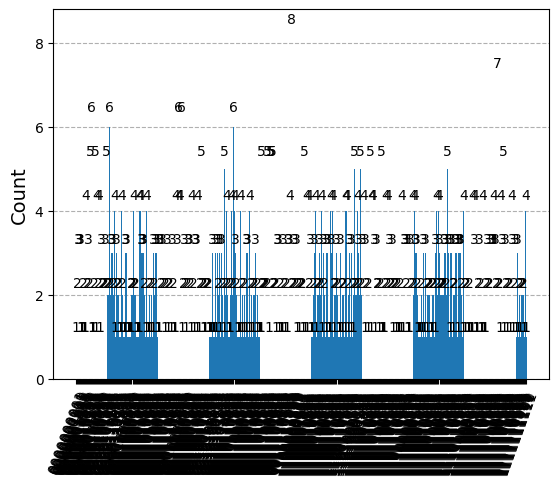

In [24]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

#상태벡터 출력하기

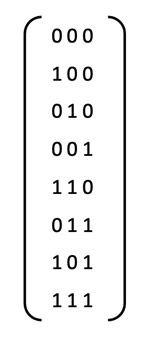

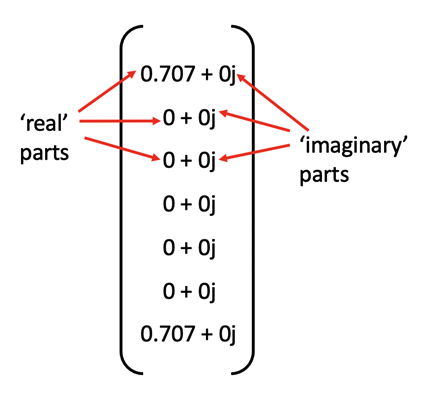

In [25]:
statevector = result.get_statevector()
statevector

Statevector([ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j, -0.+0.j,  0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


In [26]:
from qiskit.visualization import plot_state_city
plot_state_city(statevector)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7a9fda6863b0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7a9fda685090> (for post_execute):


KeyboardInterrupt: 